In [1]:
#import Libraries 
import pandas as pd
import pickle
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import ensemble
from sklearn import neighbors
from sklearn import tree
from sklearn import naive_bayes
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import dataset
data = pd.read_csv(r"LoanApprovalPrediction.csv")

In [3]:
data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
597,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [7]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [8]:
data.shape

(598, 13)

In [9]:
data.size

7774

In [10]:
data.Gender.value_counts()

Male      487
Female    111
Name: Gender, dtype: int64

In [11]:
data.Married.value_counts()

Yes    388
No     210
Name: Married, dtype: int64

In [12]:
data.Dependents.value_counts()

0.0    338
1.0    101
2.0     99
3.0     48
Name: Dependents, dtype: int64

In [13]:
#Get the number of columns of object datatype.
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 7


In [14]:
#As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)


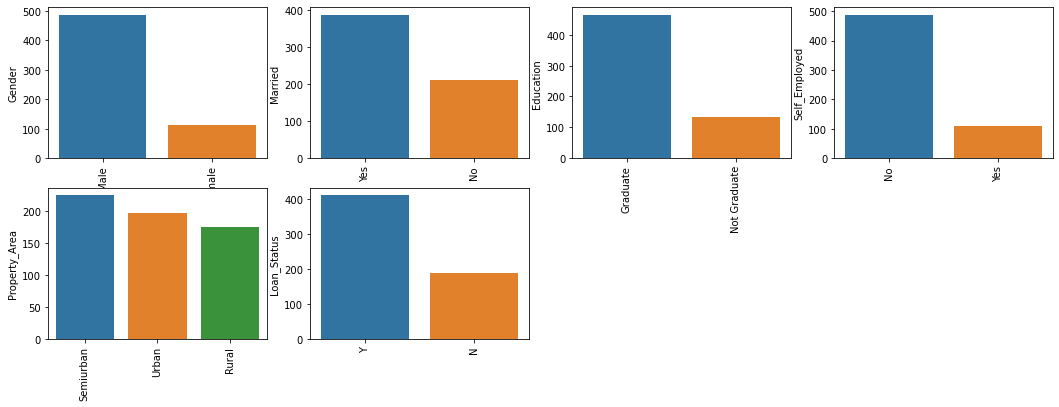

In [15]:
#Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1


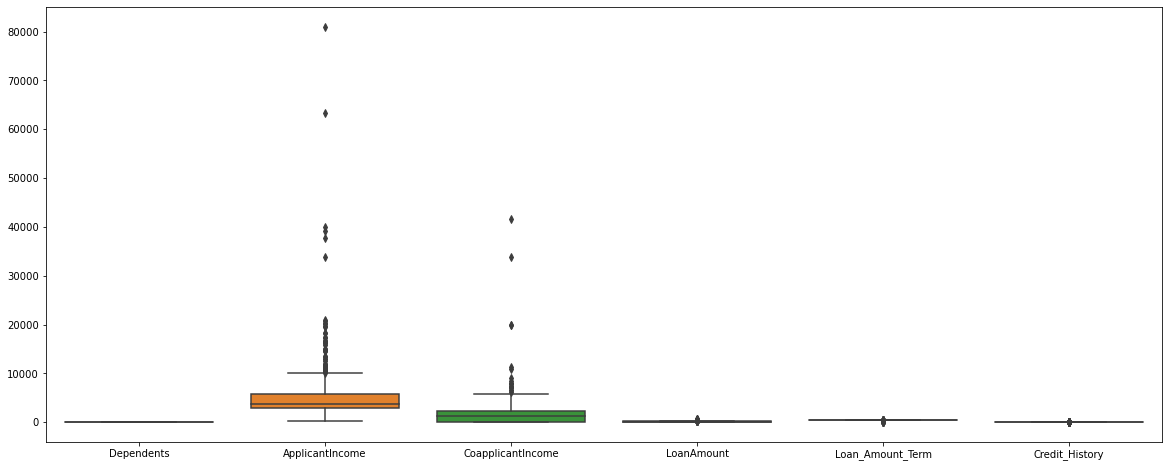

In [16]:
# Cheking Outliers 
plt.figure(figsize=(20, 8))
sns.boxplot(data = data)
plt.show()

In [17]:
data = data.loc[(data.ApplicantIncome <=7500) & (data.CoapplicantIncome <= 5600)]

In [18]:
data.shape

(491, 12)

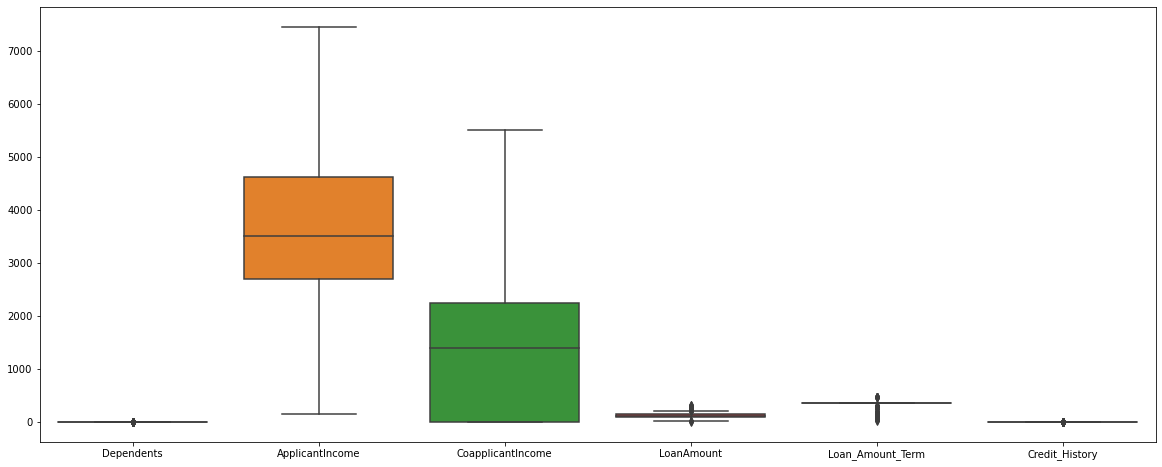

In [19]:
# Cheking Outliers 
plt.figure(figsize=(20, 8))
sns.boxplot(data = data)
plt.show()

([<matplotlib.patches.Wedge at 0x17fd9f2deb0>,
 [Text(-0.6195136616491109, 0.9089569973492206, 'yes'),
  Text(0.619513746751804, -0.9089569393461616, 'no')],
 [Text(-0.33791654271769683, 0.4957947258268476, '69%'),
  Text(0.3379165891373476, -0.4957946941888154, '31%')])

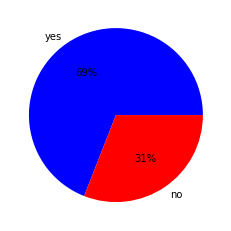

In [20]:
plt.figure(figsize=(4, 4))
plt.pie(data.Loan_Status.value_counts(), labels=["yes", "no"], colors="bright", autopct='%.0f%%')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

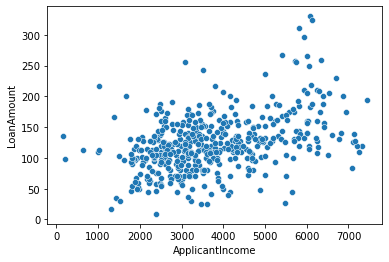

In [21]:
# for scatter plot
sns.scatterplot(data = data, x = "ApplicantIncome", y = "LoanAmount")

In [22]:
# Import label encoder
from sklearn import preprocessing
	
# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
     data[col] = label_encoder.fit_transform(data[col])


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    int32  
 1   Married            491 non-null    int32  
 2   Dependents         480 non-null    float64
 3   Education          491 non-null    int32  
 4   Self_Employed      491 non-null    int32  
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         472 non-null    float64
 8   Loan_Amount_Term   478 non-null    float64
 9   Credit_History     448 non-null    float64
 10  Property_Area      491 non-null    int32  
 11  Loan_Status        491 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 38.4 KB


In [24]:
#As all the categorical values are binary so we can use Label Encoder for all such 
#columns and the values will change into int datatype.
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<AxesSubplot:>

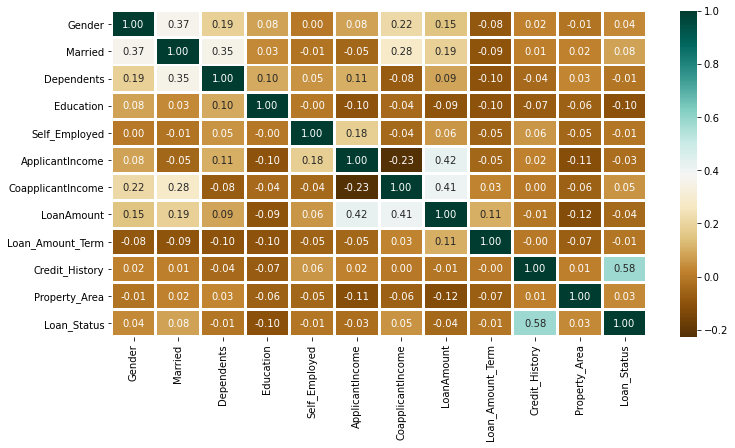

In [25]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
			linewidths=2,annot=True)


In [26]:
#The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. 
#It also shows that Credit_History has a high impact on Loan_Status.

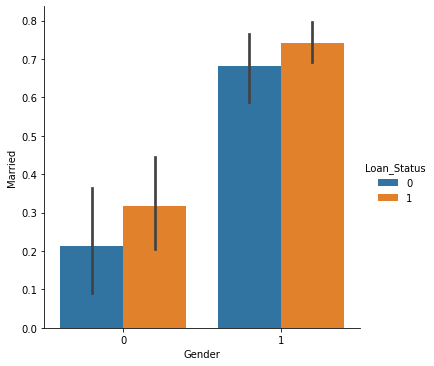

In [27]:
#Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.
sns.catplot(x="Gender", y="Married",
			hue="Loan_Status",
			kind="bar",
			data=data)


In [28]:
data.isna().sum()

Gender                0
Married               0
Dependents           11
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
#Now we will find out if there is any missing values in the dataset using below code.
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())
	
data.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
#As there is no missing value then we must proceed to model training.

In [31]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
													test_size=0.4,
													random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((294, 11), (197, 11), (294,), (197,))

# Logistic Regression

In [32]:
logModel = LogisticRegression()


In [33]:
logModel.fit(X_train, Y_train)


LogisticRegression()

In [34]:
y_pred = logModel.predict(X_test)

In [35]:
accuracy_score(Y_test,y_pred)

0.8324873096446701

In [36]:
confusion_matrix(Y_test,y_pred)


array([[ 30,  31],
       [  2, 134]], dtype=int64)

# Random Forest

In [37]:
#Random Forest
rf_random_ = RandomForestClassifier()

In [38]:
rf_random_.fit(X_train, Y_train)

RandomForestClassifier()

In [39]:
y_pred = rf_random_.predict(X_test)

In [40]:
accuracy_score(Y_test,y_pred)

0.8223350253807107

In [41]:
confusion_matrix(Y_test,y_pred)

array([[ 32,  29],
       [  6, 130]], dtype=int64)

# Dicision Tree

In [42]:
# Dicision Tree
DT = DecisionTreeClassifier()

In [43]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [44]:
y_pred = DT.predict(X_test)

In [45]:
accuracy_score(Y_test,y_pred)

0.6954314720812182

In [46]:
confusion_matrix(Y_test,y_pred)

array([[ 33,  28],
       [ 32, 104]], dtype=int64)

# # Gradient Boosting

In [47]:
GB = GradientBoostingClassifier()

In [48]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier()

In [49]:
y_pred = GB.predict(X_test)

In [50]:
accuracy_score(Y_test,y_pred)

0.7817258883248731

In [51]:
confusion_matrix(Y_test,y_pred)

array([[ 33,  28],
       [ 15, 121]], dtype=int64)

# KNeighborsClassifier

In [52]:
kn=KNeighborsClassifier()

In [53]:
kn.fit(X_train, Y_train)

KNeighborsClassifier()

In [54]:
y_pred = kn.predict(X_test)

In [55]:
accuracy_score(Y_test,y_pred)

0.649746192893401

In [56]:
confusion_matrix(Y_test,y_pred)

array([[ 19,  42],
       [ 27, 109]], dtype=int64)

# SVC

In [57]:
svc= SVC()

In [58]:
svc.fit(X_train, Y_train)

SVC()

In [59]:
y_pred = svc.predict(X_test)

In [60]:
accuracy_score(Y_test,y_pred)

0.6903553299492385

In [61]:
confusion_matrix(Y_test,y_pred)

array([[  0,  61],
       [  0, 136]], dtype=int64)

# GaussianNB

In [62]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()

In [63]:
gn.fit(X_train, Y_train)

GaussianNB()

In [64]:
y_pred = gn.predict(X_test)

In [65]:
accuracy_score(Y_test,y_pred)

0.8324873096446701

In [66]:
confusion_matrix(Y_test,y_pred)

array([[ 31,  30],
       [  3, 133]], dtype=int64)

In [67]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,123.226695,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [68]:
y =GB.predict([[1,0,0.0,0,0,5849,0.0,144.9688,360.0,1.0,2]])

In [69]:
y

array([1])

In [71]:
ls = []
for i in data.columns:
    if(i == 'Loan_Status'):
        continue
    a = float(input(f"Enter the {i}: "))
    ls.append(a)
    
P = rf_random_.predict(np.array(ls).reshape(1,-1))
if P == 0:
    print("Loan_aprrove")
else:
    print("Lone_not_approve")
    

Enter the Gender: 1
Enter the Married: 0
Enter the Dependents: 0
Enter the Education: 1
Enter the Self_Employed: 0
Enter the ApplicantIncome: 3000
Enter the CoapplicantIncome: 2000
Enter the LoanAmount: 150
Enter the Loan_Amount_Term: 360
Enter the Credit_History: 1
Enter the Property_Area: 2
Lone_not_approve


In [72]:
filename = open("rf_random_1.pkl",'wb')
pickle.dump(rf_random_,filename)